# **Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

**Load the Dataset**

In [ ]:
netflix = pd.read_csv('Netflix_Userbase.csv')
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


**Missing Values**

In [ ]:
missing = netflix.notnull()
missing.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True


**Encode Categorical Variables**

In [ ]:
encoder = LabelEncoder()

netflix['SubType'] = encoder.fit_transform(netflix['Subscription Type'])
netflix['_Country'] = encoder.fit_transform(netflix['Country'])
netflix['_Device'] = encoder.fit_transform(netflix['Device'])

In [ ]:
dumnet = pd.get_dummies(netflix, drop_first=True)
dumnet.head()

,User ID,Monthly Revenue,Age,SubType,_Country,_Device,Subscription Type_Premium,Subscription Type_Standard,Join Date_01-05-23,Join Date_01-06-22,...,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,1,10,28,0,9,2,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,2,15,35,1,2,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,12,42,2,8,1,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,4,12,51,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,33,0,4,2,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0


**Feature Selection**

In [ ]:
dumnet['Feedback'] = (dumnet['SubType']==1).astype(int)

In [ ]:
X = dumnet[['Age', 'SubType', '_Country', 'Gender_Male', 'Feedback', 'Monthly Revenue']]
xy = dumnet[['Age', 'SubType', '_Country', '_Device', 'Gender_Male']]
y = netflix['Monthly Revenue']
yx = dumnet['Feedback']

# **Part 2: Exploratory Data Analysis (EDA)**

**Descriptive Statistics**

In [ ]:
X.describe()

,Age,SubType,_Country,Gender_Male,Feedback,Monthly Revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,38.795600,0.907600,5.116400,0.497200,0.29320,12.508400
std,7.171778,0.835788,2.972942,0.500092,0.45532,1.686851
min,26.000000,0.000000,0.000000,0.000000,0.00000,10.000000
25%,32.000000,0.000000,2.000000,0.000000,0.00000,11.000000
50%,39.000000,1.000000,6.000000,0.000000,0.00000,12.000000
75%,45.000000,2.000000,8.000000,1.000000,1.00000,14.000000
max,51.000000,2.000000,9.000000,1.000000,1.00000,15.000000


**Visualizations**

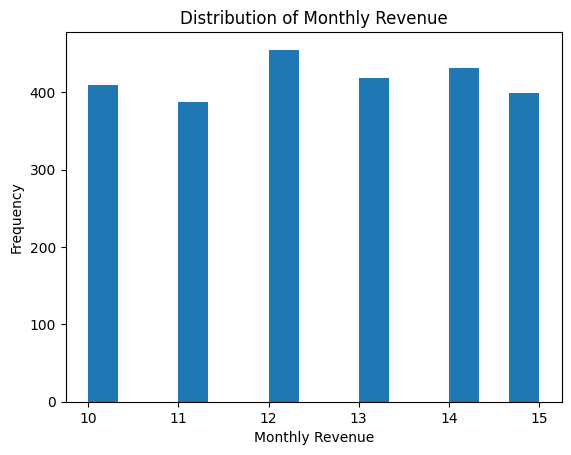

In [ ]:
plt.hist(netflix['Monthly Revenue'], bins=15)
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Revenue')
plt.show()

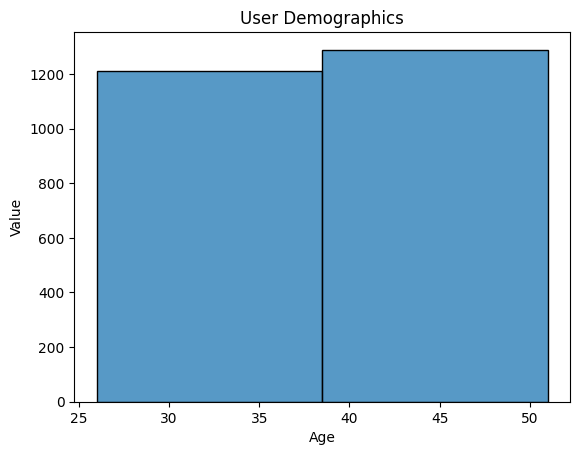

In [ ]:
sns.histplot(data=netflix, x="Age", binwidth=10)
plt.title('User Demographics')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

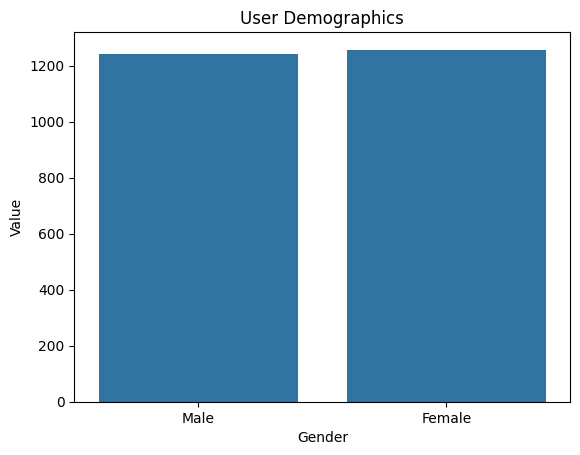

In [ ]:
sns.countplot(data=netflix, x="Gender")
plt.title('User Demographics')
plt.xlabel('Gender')
plt.ylabel('Value')
plt.show()

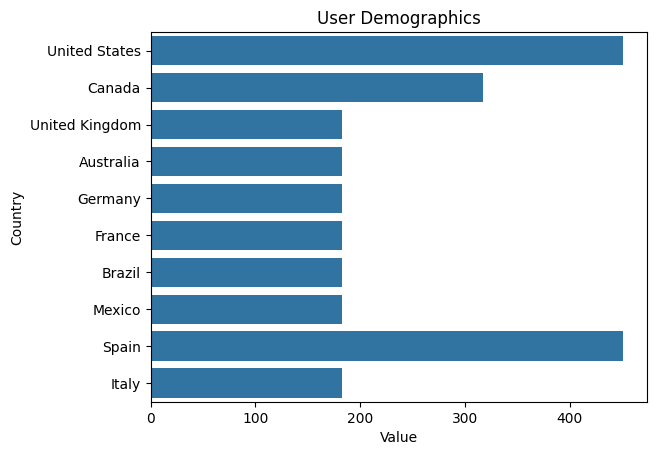

In [ ]:
sns.countplot(y="Country", data=netflix)
plt.title('User Demographics')
plt.xlabel('Value')
plt.ylabel('Country')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

**Build the Model**

In [ ]:
xy_train, xy_test, y_train, y_test = train_test_split(xy, y, test_size = 0.2, random_state = 42)

LinearModel = LinearRegression()
LinearModel.fit(xy_train, y_train)

LinearRegression()

In [ ]:
new_data = np.array([[ 33, 2, 7, 3, 1]])

prediction = LinearModel.predict(new_data)

print(f"Predict Monthly Revenue: {prediction[0]}")

Predict Monthly Revenue: 12.537247521444487


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Model Evaluation**

In [ ]:
r2 = r2_score(y_test, LinearModel.predict(xy_test))
rmse = np.sqrt(mean_squared_error(y_test, LinearModel.predict(xy_test)))

print(f"R-squared: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: -0.0083
Root Mean Squared Error: 1.67


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

**Model Building**

In [ ]:
X_train, X_test, yx_train, yx_test = train_test_split(X, yx, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, yx_train)

LogisticRegression()

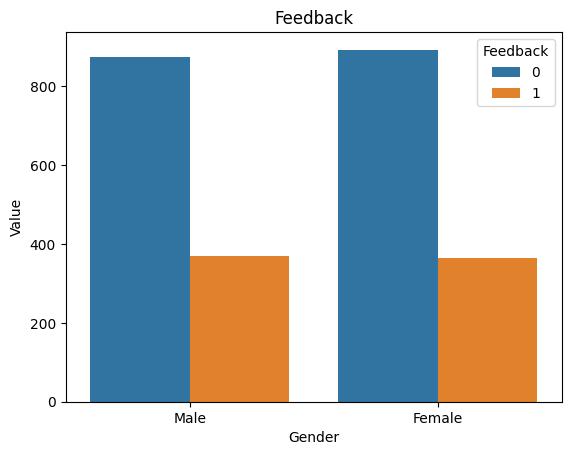

In [ ]:
sns.countplot(x = netflix['Gender'], hue = X['Feedback'])
plt.title('Feedback')
plt.xlabel('Gender')
plt.ylabel('Value')
plt.show()

**Evaluation**

In [ ]:
yx_pred = LogisticModel.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(yx_test, yx_pred)
precision = precision_score(yx_test, yx_pred)
recall = recall_score(yx_test, yx_pred)
conf_matrix = confusion_matrix(yx_test, yx_pred)
class_report = classification_report(yx_test, yx_pred)

print(f"Accuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix: 
[[354   0]
 [  0 146]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       146

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



# **Part 5: Comparative Analysis and Visualization**

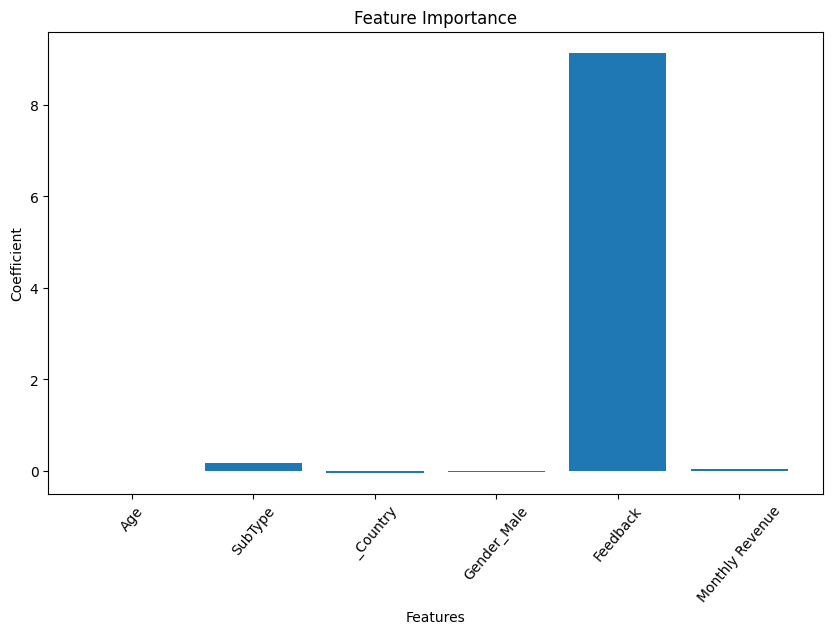

In [ ]:
feature_importance = LogisticModel.coef_[0]
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.xticks(rotation=50)
plt.show()